In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/PJH/OneDrive/Python/Example/covid19/Covid19_dataset/Covid19_KOR.csv')
t = df.iloc[0:30, 0]
I = df.iloc[0:30, 4]

In [3]:
# prameter value extraction
def logistic_fit(t, L, beta_pre, t0):
    return L/(1+np.exp(-beta_pre*(t-t0)))
p0 = [0,0,20]
popt, pcov = curve_fit(logistic_fit, t, I, p0)
I_logistic_fit = logistic_fit(t, *popt)
print(popt)

[ 0.70322513  0.34099494 16.48629104]


In [4]:
sns.set_style("darkgrid")

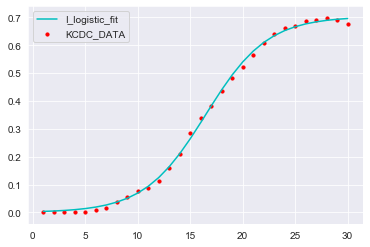

In [5]:
# curve fitting
plt.figure()
plt.scatter(t, I, s=10, c='r', label='KCDC_DATA')
plt.plot(t, I_logistic_fit, 'c-', label='I_logistic_fit')
plt.legend()
plt.show()

In [6]:
# ODE design
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta*S*I
    dI_dt = beta*S*I - gamma*I
    dR_dt = gamma*I
    return([dS_dt, dI_dt, dR_dt])

In [7]:
#initial conditions
S0 = 1
I0 = 19/10874
R0 = 9/10874
beta = 0.38731105
gamma = 1/30

t = np.linspace(0, 86, 86)

In [8]:
# solve
sol = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
sol = np.array(sol)

In [9]:
time = df.iloc[:,0]
I = df.iloc[:,4]
R = df.iloc[:,10]

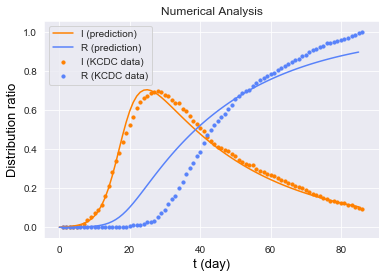

In [10]:
plt.figure()
plt.title("Numerical Analysis")
plt.scatter(time, I, s=10, c='#FF8000', label='I (KCDC data)')
plt.scatter(time, R, s=10, c='#5882FA', label='R (KCDC data)')
plt.plot(sol[:, 1], '#FF8000', label='I (prediction)')
plt.plot(sol[:, 2], '#5882FA', label='R (prediction)')
plt.xlabel('t (day)',  {'color': 'k', 'fontsize': 13})
plt.ylabel('Distribution ratio', {'color': 'k', 'fontsize': 13})
plt.legend()
plt.savefig('Num.png', dpi=300)
plt.show()